## Simple RNN

In [1]:
import numpy as np


timesteps = 100
input_features = 32
output_features = 64

inputs = np.random.random((timesteps, input_features))
state_t = np.zeros(shape=(output_features, ))


W = np.random.random((output_features, input_features))
U = np.random.random((output_features, output_features))
b = np.random.random((output_features, ))

successive_outputs = []

for input_t in inputs:
    output_t = np.tanh(np.dot(W, input_t) + np.dot(U, state_t) + b)
    state_t = output_t
    successive_outputs.append(output_t)
    
final_output_sequence = np.vstack(successive_outputs)

In [2]:
final_output_sequence.shape

(100, 64)

## Simple RNN From Keras

In [3]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN


vocabulary_sz = 10000
embedding_sz = 32

model = Sequential()
model.add(Embedding(input_dim=vocabulary_sz, output_dim=embedding_sz))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32, return_sequences=True))
model.add(SimpleRNN(32))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, None, 32)          2080      
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 32)                2080      
Total params: 328,320
Trainable params: 328,320
Non-trainable params: 0
_________________________________________________________________


## Using RNNs For Move Review Classification

### Data Prep

In [4]:
from keras.datasets import imdb
from keras.preprocessing import sequence


max_features = 10000 # the number of words 
max_len = 1500 # the maximum number of words to use from any given review
batch_size = 32

(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

input_train = sequence.pad_sequences(input_train, max_len)
input_test = sequence.pad_sequences(input_test, max_len)

/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/somnath/install/anaconda3/envs/dl/lib/python3.8/site-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [5]:
print(len(input_train)), print(len(input_test))

25000
25000


(None, None)

In [6]:
input_train.shape

(25000, 1500)

In [7]:
input_test.shape

(25000, 1500)

### Model

In [8]:
from keras.layers import Dense


model =  Sequential()
model.add(Embedding(max_features, batch_size))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, 
                    y_train, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 1069s 2s/step - loss: 0.5114 - acc: 0.7388 - val_loss: 0.3464 - val_acc: 0.8568
Epoch 2/10
625/625 [==============================] - 1198s 2s/step - loss: 0.3376 - acc: 0.8615 - val_loss: 0.3685 - val_acc: 0.8532
Epoch 3/10
625/625 [==============================] - 1242s 2s/step - loss: 0.2822 - acc: 0.8867 - val_loss: 0.3265 - val_acc: 0.8710
Epoch 4/10
625/625 [==============================] - 1238s 2s/step - loss: 0.2528 - acc: 0.9031 - val_loss: 0.3314 - val_acc: 0.8688
Epoch 5/10
625/625 [==============================] - 1436s 2s/step - loss: 0.2101 - acc: 0.9192 - val_loss: 0.3790 - val_acc: 0.8512
Epoch 6/10
625/625 [==============================] - 1199s 2s/step - loss: 0.1823 - acc: 0.9322 - val_loss: 0.4078 - val_acc: 0.8524
Epoch 7/10
625/625 [==============================] - 1108s 2s/step - loss: 0.1488 - acc: 0.9464 - val_loss: 0.5976 - val_acc: 0.7776
Epoch 8/10
625/625 [==============================] - 1218s 2s

### Plots

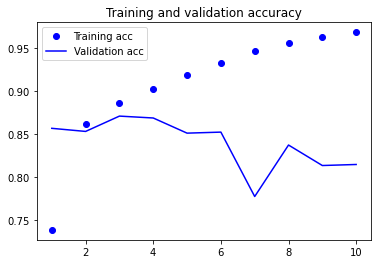

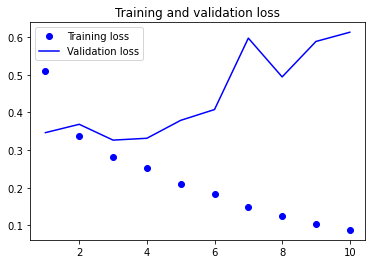

In [9]:
import matplotlib.pyplot as plt


acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')

plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')

plt.title('Training and validation loss')
plt.legend()

plt.show()